# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [3]:
import pandas as pd
import numpy as np
import csv
import xlrd
import json
import os
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
import seaborn as sns

In [4]:
# Reading data

Petrol_Data = pd.read_csv("C:/Users/Tanu/Desktop/Greatleaning/Oct'18/External_Lab/petrol.csv")
Petrol_Data.head()

,tax,income,highway,dl,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
Petrol_Data.shape

(48, 5)

In [6]:
# Checking Statistical Details
Petrol_Data.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [9]:
# Creating copy of Petrol Data  
Petrol_Data1 = Petrol_Data.copy()

In [10]:
Petrol_Data1.shape

(48, 5)

In [12]:
# Calculating 1st Quartile
Q1 = Petrol_Data1.quantile(0.25)

# # Calculating 3rd Quartile
Q3 = Petrol_Data.quantile(0.75)

# Calculating interquartile range

IQR = Q3-Q1

# Seeing output
IQR


tax                1.1250
 income          839.7500
 highway        4045.7500
 dl                0.0655
 consumption     123.2500
dtype: float64

In [15]:
# Finding the outliers and capping them using min & max cap

Petrol_Data1_out = Petrol_Data1[~((Petrol_Data1 < (Q1 - 1.5 * IQR)) |(Petrol_Data1 > (Q3 + 1.5 * IQR))).any(axis=1)]

#  datapoints falling below (Q1 - 1.5 * IQR) & above (Q3 + 1.5 * IQR) will be outlier

In [16]:
# Checking Output

Petrol_Data1_out.shape

(43, 5)

# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

In [17]:
# Calculating relationships of variables using correlation function & correlation plots

# Correlation function
Petrol_Data1_out.corr()

,tax,income,highway,dl,consumption
tax,1.000000,-0.109537,-0.390602,-0.314702,-0.446116
income,-0.109537,1.000000,0.051169,0.150689,-0.347326
highway,-0.390602,0.051169,1.000000,-0.016193,0.034309
dl,-0.314702,0.150689,-0.016193,1.000000,0.611788
consumption,-0.446116,-0.347326,0.034309,0.611788,1.000000


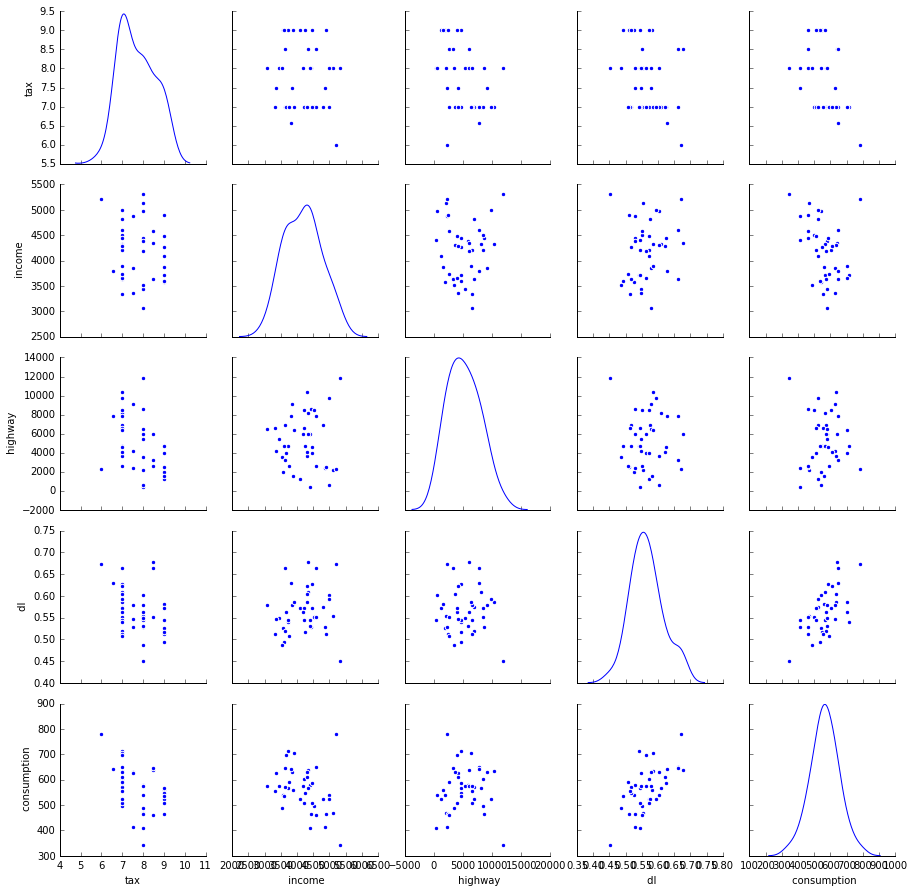

In [26]:
#  correlation plots

Petrol_Data1_out_attr = Petrol_Data1_out.iloc[:, 0:5]

sns.pairplot(Petrol_Data1_out_attr, diag_kind='kde')

#df['A'].corr(df['B'])

#,'income','highway','dl']

In [ ]:
# Observation
# Calculation & plots show-

#dependent variable 'consumption' & 'dl' are positively correlated 
# means 'consumption' would increase if 'dl' increases 

# Along with this 'consumption' & 'tax' are negatively correlated 
# means if 'tax' is increasing , 'consumption' is decreasing 

# Rest of the two variables are not exhibiting any clear relationship


### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [18]:
Petrol_Data1_out.columns

# Dividing the data set into feature(X) set by keeping only highly correlated variables

X = Petrol_Data1_out.drop(' consumption', axis=1)
X = X.drop({' income', ' highway'}, axis=1)

# Seeing output
X.head()


,tax,dl
0,9.0,0.525
1,9.0,0.572
2,9.0,0.580
3,7.5,0.529
4,8.0,0.544


In [19]:
# Dividing the data set into target(Y) set 
y = Petrol_Data1_out[[' consumption']]

# Seeing output
y.head()

,consumption
0,541
1,524
2,561
3,414
4,410


# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [20]:
# Importing train, test & split
from sklearn.model_selection import train_test_split

In [21]:
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=101)

# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [22]:
# Using LinearRegression function and finding bestfit model on training data

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
# Estimating the coefficient for each input feature
reg_model.coef_

array([[-23.3070373 , 868.62449398]])

In [24]:
# Constructing a dataframe with coefficients and X.columns as columns

coeffs = pd.DataFrame(data=reg_model.coef_.transpose(), index=X.columns, columns=['Coefficient'])


In [67]:
# Displaying the above dataframe 
coeffs

,Coefficient
tax,-23.307037
dl,868.624494


# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [25]:
# Calculating the accuracy score for training dataset
reg_model.score(X_train, y_train)

0.40418269299359655

In [26]:
# Calculating the accuracy score for testing dataset
reg_model.score(X_test, y_test)

0.5187405234369062

# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [27]:
# Dividing the data set into feature(X) set by keeping all dependent variables
X1 = Petrol_Data1_out.drop(' consumption', axis=1)

In [28]:
# Seeing feature set which includes all dependent variables
X1.head()

,tax,income,highway,dl
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572
2,9.0,3865,1586,0.580
3,7.5,4870,2351,0.529
4,8.0,4399,431,0.544


In [29]:
# Split X1 and y into training and test set in 80:20 ratio

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.20 , random_state=101)


In [30]:
# Building Regression Model for cunsumption variable by using  new feture set 
reg_model1 = LinearRegression()
reg_model1.fit(X1_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
# Calculating the accuracy score for training dataset
reg_model1.score(X1_train, y_train)

0.6468662125530596

In [32]:
# Calculating the accuracy score for testing dataset
reg_model1.score(X1_test, y_test)

0.6287350988843095

# Question 9: Print the coefficients of the multilinear regression model

In [37]:
reg_model1.coef_

array([[-2.73456306e+01, -7.76659442e-02, -3.04944626e-04,
         8.21501129e+02]])

# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

In [ ]:
# R - square will be high for that specific model which has more number of dependent variables
# because as the independent variables increase, R- Square increases also.



# In the first model, we have taken two independent variables - tax, dl 
# which had high correlation with dependent variable - consumption. 
# In the second model, there are four independent variables-- tax, dl,income,highway

# So for the second model R- square will be higher compared to the first model 

  